In [269]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as  plt

In [328]:
old_df = pd.read_csv("../data/csv_files/at200.csv", usecols = [0,1,2,3,4,5,6,8,9])
old_df = old_df.dropna()

In [329]:
old_df.head

<bound method NDFrame.head of                      Date Time  Actual Conductivity (ÂµS/cm)  \
0      2023-01-11 14:34:00.000                    161.135101   
1      2023-01-11 14:39:00.000                    161.549484   
2      2023-01-12 00:00:00.000                    160.563217   
3      2023-01-13 00:00:00.000                    160.465378   
4      2023-01-14 00:00:00.000                    160.041122   
...                        ...                           ...   
98129  2023-10-31 00:00:00.000                    340.631592   
98130  2023-10-31 01:00:00.000                    340.574677   
98131  2023-10-31 02:00:00.000                    340.628418   
98132  2023-10-31 03:00:00.000                    340.634491   
98133  2023-10-31 04:00:00.000                    340.636108   

       Specific Conductivity (ÂµS/cm)  Salinity (psu)  Resistivity (â„¦-cm)  \
0                          169.814270        0.089782           6205.972656   
1                          169.920212      

In [330]:
df = old_df.copy()
# the datetime is converted to timestamp in seconds
df['Date Time'] = df['Date Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000)
df = df.apply(pd.to_numeric, errors='coerce')

In [331]:
df.head

<bound method NDFrame.head of           Date Time  Actual Conductivity (ÂµS/cm)  \
0      1.673469e+12                    161.135101   
1      1.673470e+12                    161.549484   
2      1.673503e+12                    160.563217   
3      1.673590e+12                    160.465378   
4      1.673676e+12                    160.041122   
...             ...                           ...   
98129  1.698728e+12                    340.631592   
98130  1.698732e+12                    340.574677   
98131  1.698736e+12                    340.628418   
98132  1.698739e+12                    340.634491   
98133  1.698743e+12                    340.636108   

       Specific Conductivity (ÂµS/cm)  Salinity (psu)  Resistivity (â„¦-cm)  \
0                          169.814270        0.089782           6205.972656   
1                          169.920212        0.089823           6190.053711   
2                          167.590134        0.088505           6228.076660   
3                

In [332]:
min_date = min(df["Date Time"])
min_date

1667861340000.0

In [333]:
max_date = max(df["Date Time"])
max_date

1698742800000.0

In [342]:
old_copy = df.copy()
number_of_month = 3
months = number_of_month * 30 * 24 * 60 * 60 * 1000

In [343]:
df = df[df["Date Time"] - min_date < months]

In [344]:
df.size

99378

In [345]:
# Downsample the data: for instance, taking every 10th point
df_downsampled = df.iloc[::10, :]
df_downsampled.size

9945

In [346]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple','turquoise','lime', 'gold', "slategray"]

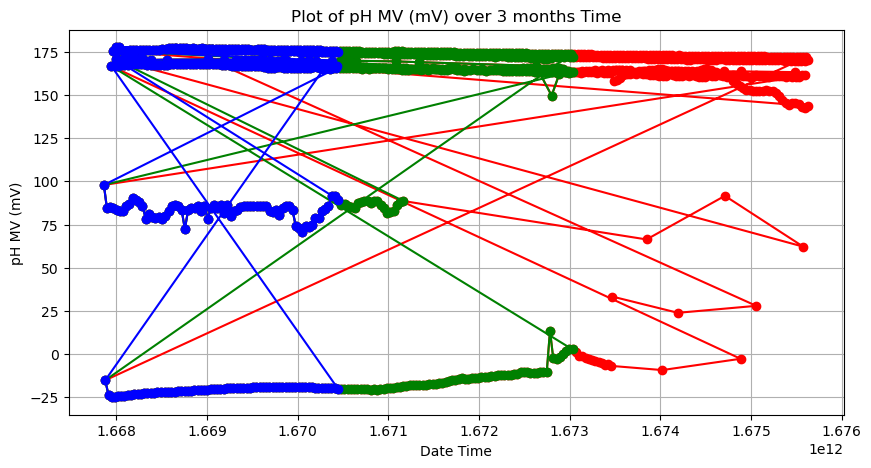

In [347]:
plt.figure(figsize=(10, 5))

for i in reversed(range(number_of_month)):
    temp = df_downsampled[(df_downsampled["Date Time"] - min_date) < ((i + 1) * 30 * 24 * 60 * 60 * 1000)]
    plt.plot(temp["Date Time"], temp["pH MV (mV)"], marker='o', linestyle='-', color=colors[i])

plt.xlabel('Date Time')
plt.ylabel('pH MV (mV)')
plt.title(f'Plot of pH MV (mV) over {number_of_month} months Time')
plt.grid(True)
plt.show()

    
    

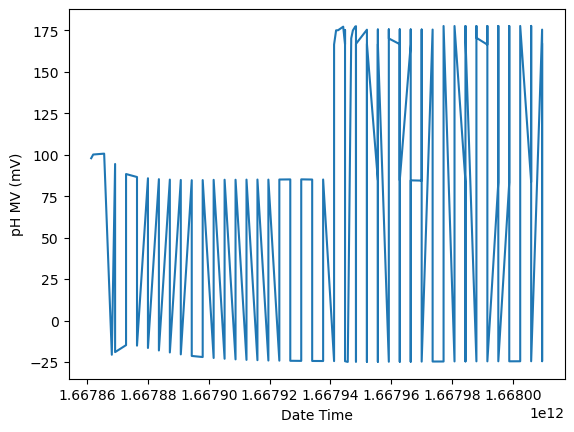

In [340]:
# for the first 150 data
old_copy = old_copy.sort_values(by='Date Time')
temp = old_copy.iloc[:150]
plt.plot(temp["Date Time"], temp["pH MV (mV)"])
plt.xlabel('Date Time')
plt.ylabel('pH MV (mV)')
plt.show()


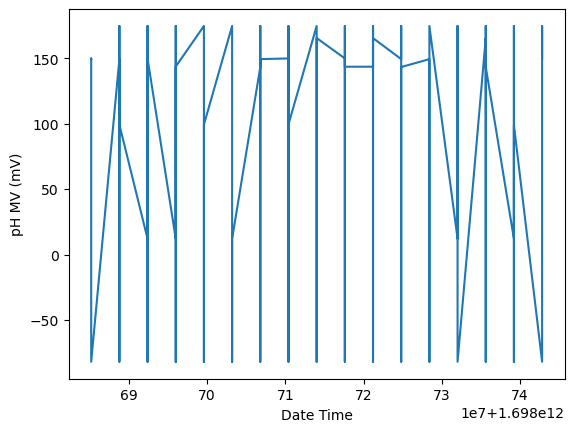

In [341]:
# for the last 150 data
old_copy = old_copy.sort_values(by='Date Time')
temp = old_copy.iloc[-150:]
plt.plot(temp["Date Time"], temp["pH MV (mV)"])
plt.xlabel('Date Time')
plt.ylabel('pH MV (mV)')
plt.show()
